In [1]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [2]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["bp_smo_canceled", "least_confident", "w_kmeans",10, 30, 0.01, "Adam",20])
print(len(runs_bp_smo))
#all_run_ids_smo = get_run_ids(runs_bp_smo)
run_ids_smo = get_run_ids(runs_bp_smo.head(5))
#nochmal mit tail ausgeben und schauen, ob es einen großen Unterschied macht

5


In [3]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.beta"],[True, True, True, True, True, True],["bp_lmo_canceled", "least_confident", "w_kmeans", 30, 0.01, 20])
print(len(runs_bp_lmo))
#run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
run_ids_bp_lmo = get_run_ids(runs_bp_lmo.head(5))
run_ids_bp_lmo

2


0    54a18527124e48ee84dc0a53e9bd5bb5
1    dad03e9c6be14fc09d7343698178214b
Name: run_id, dtype: object

In [4]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["centroids", "least_confident", "w_kmeans",1000, 30, 0.01, "Adam", 20])
print(len(runs_centroids))
#run_ids_centroids = get_run_ids(runs_centroids)
run_ids_centroids = get_run_ids(runs_centroids.head(5))
run_ids_centroids

5


0    fed6bb46fe6f4aaeae8a0abb75e47929
1    72001bf882fc41728123532a07998bad
2    89ccf4d9776144dfa09c9fbff8dce613
3    1c1f2a11b19e4b15b96668a15986f90f
4    7b9f55f9bacb459fb5f4ab740c2ef0c6
Name: run_id, dtype: object

In [5]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["bp_prop_clustersize", "least_confident", "w_kmeans",1000, 30, 0.01, 10, 20])
print(len(runs_bp_clusterwise))
#run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise.head(5))
run_ids_bp_clusterwise

5


0    48669d2be1d9489787103e034c7db492
1    8955364475bb45b690040cfd220354e2
2    c312f8efaeab467cbdf790c9c0be675e
3    c62f54b1a8c94d89a00a559239171c1a
4    bc4efd9fcdc94176aa9e02737bdb8abc
Name: run_id, dtype: object

In [6]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["boundary_points", "least_confident", "w_kmeans",1000, 0.01, 30, 10, 20])
print(len(runs_boundary))
#run_ids_boundary = get_run_ids(runs_boundary)
run_ids_boundary = get_run_ids(runs_boundary.head(5))
run_ids_boundary

5


0    c5376043942142048f521352620900de
1    cb9add8c7f664cf6a011272fed0b72a2
2    69892368786d47a889f300684c5718ae
3    da10c3583acc4378896c170eef66c361
4    6f075e75795d467cbf6eaa1f044647ad
Name: run_id, dtype: object

In [7]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
#run_ids_random = get_run_ids(runs_random)
run_ids_random = get_run_ids(runs_random.head(5))
run_ids_random

10


0    7f1e5628b6334cc3a9de37e61104358d
1    421ff61556e5461f97a973fa111c3c63
2    ae5681ec87874fbda5bd998ad8c13970
3    1437f6a0f73a4039ad88d8c63b54f84c
4    d2a0054c9b594e3cb78e9adb27ac6157
Name: run_id, dtype: object

In [8]:
runs_random_uncertainty = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size", "params.beta", "params.uncertainty"],[True, True, True, True, True, True],["random_uncertainty", 0.01, 30, 1000, 20, "least_confident"])
print(len(runs_random_uncertainty))
#run_ids_random = get_run_ids(runs_random)
run_ids_random_uncertainty = get_run_ids(runs_random_uncertainty.head(5))
run_ids_random_uncertainty

5


0    04865de534e3485bbe25f9d05d4f75be
1    5a88130208a545ceb433f2073c03a52c
2    d4f6e9f137c4420885646fc35c9401e0
3    f4d8e05ca871493dabf379dd96b6b22b
4    b271c22c5a2b4729ba24f4c05ff5b286
Name: run_id, dtype: object

In [9]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
#samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)
samples_labeled_random_uncertain, avg_accs_random_uncertain = get_labeledSamples_avgAcc(run_ids_random_uncertainty, tracking)

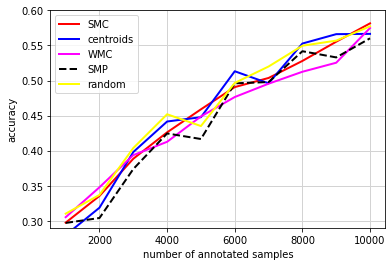

In [10]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
#plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

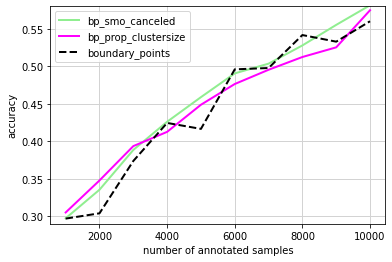

In [11]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [12]:
avg_accs_centroids

array([0.27948, 0.31868, 0.39802, 0.44154, 0.44768, 0.51318, 0.49594,
       0.5527 , 0.56608, 0.5665 ])

In [13]:
avg_accs_boundary

array([0.29694, 0.30398, 0.37378, 0.42452, 0.41658, 0.49598, 0.49778,
       0.54174, 0.53292, 0.56014])

In [14]:
avg_accs_bp_smo

array([0.29734, 0.33544, 0.38848, 0.4261 , 0.45892, 0.49062, 0.5036 ,
       0.5279 , 0.5553 , 0.58148])

In [15]:
#avg_accs_bp_lmo

In [16]:
avg_accs_clusterwise

array([0.30512, 0.3478 , 0.39362, 0.41262, 0.44878, 0.47644, 0.49544,
       0.51246, 0.52534, 0.57482])

In [17]:
avg_accs_random

array([0.31016, 0.33688, 0.40374, 0.45186, 0.43506, 0.49656, 0.51994,
       0.54958, 0.55688, 0.57726])

In [18]:
avg_accs_random_uncertain

array([0.29694, 0.33688, 0.3959 , 0.41192, 0.44138, 0.514  , 0.51272,
       0.51094, 0.54172, 0.56792])